In [2]:
from sklearn.decomposition import FastICA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
f = open('pim.txt')

In [4]:
pim = f.readline()

In [5]:
pim = pim.split('\t')

In [6]:
pim = np.array(list(map(lambda x: float(x), pim)))

In [7]:
f.close()

In [8]:
f = open('nf.txt')
nf = f.readline()
nf = nf.split('\t')
nf = np.array(list(map(lambda x: float(x), nf)))
f.close()

In [9]:
f = open('u1.txt')
u1 = f.readline()
u1 = u1.split('\t')
u1 = np.array(list(map(lambda x: float(x), u1)))
f.close()

In [10]:
rx1 = pim + nf + u1

In [11]:
f = open('u2.txt')
u2 = f.readline()
u2 = u2.split('\t')
u2 = np.array(list(map(lambda x: float(x), u2)))
f.close()

In [12]:
u2 = u2 ** 2

In [13]:
rx2 = pim + nf + u2

In [147]:
ica = FastICA(n_components=2, random_state=0)

In [148]:
rx1 = rx1.reshape((250000,1))

In [149]:
rx2 = rx2.reshape((250000,1))

In [150]:
rx = np.hstack((rx1,rx2))

In [151]:
s = ica.fit_transform(rx)

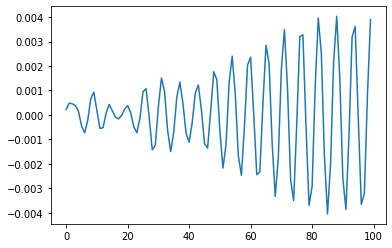

In [152]:
plt.plot(s[:100,0])

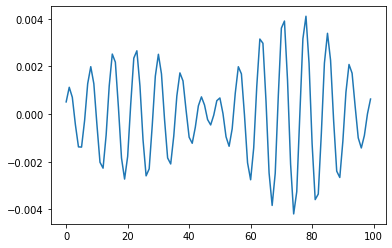

In [153]:
plt.plot(s[:100,1])

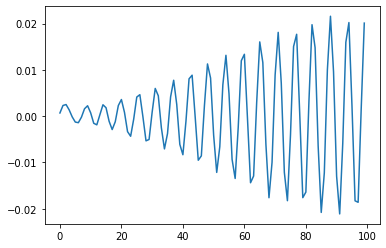

In [154]:
plt.plot(pim[:100])

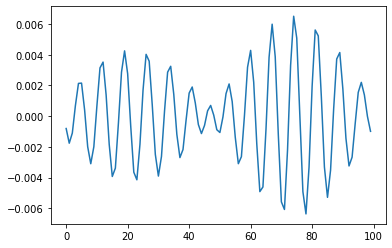

In [171]:
plt.plot((u1 + u2 ** 2)[:100])

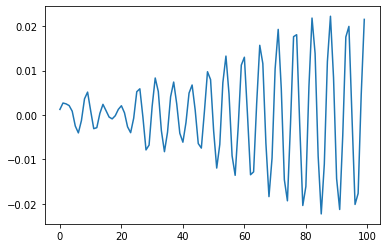

In [155]:
plt.plot((pim+nf)[:100])

In [156]:
signal = pim + nf
signal_norm = signal / np.max(np.abs(signal))

In [157]:
s1_norm = s[:,0] / np.max(np.abs(s[:,0]))

In [158]:
np.linalg.norm(s1_norm - pim_norm)

7.705931758117919

In [159]:
np.linalg.norm(signal_norm - s1_norm)

0.08199487267445835

In [160]:
fft_values = np.fft.fft(s[:,0])
mean_value = np.mean(np.abs(fft_values))
threshold = 3.3 * mean_value
fft_values = np.where(np.abs(fft_values) < threshold, 0, fft_values)
filtered_samples = np.real(np.fft.ifft(fft_values))

In [161]:
filtered_samples_norm = filtered_samples / np.max(np.abs(filtered_samples))
pim_norm = pim / np.max(np.abs(pim))

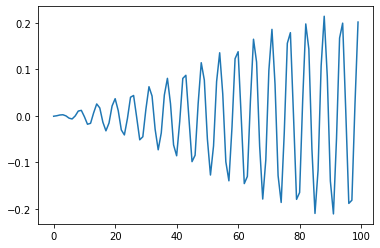

In [162]:
plt.plot(filtered_samples_norm[:100])

In [163]:
np.linalg.norm(filtered_samples_norm - pim_norm)

3.6421306576774057

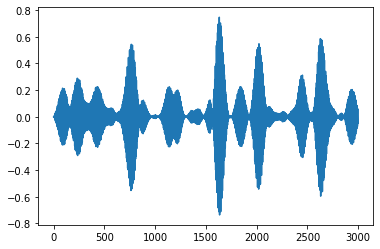

In [172]:
plt.plot(filtered_samples_norm[:3000])

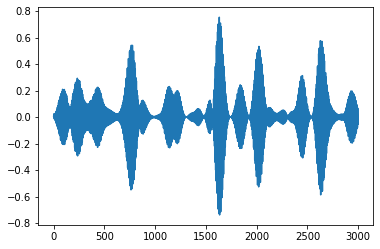

In [173]:
plt.plot(pim_norm[:3000])